# STEP 1: PROBLEM STATEMENT

 Loan approval is vital in the financial sector, determining applicants' eligibility for credit based on financial profiles. This process impacts individuals’ access to funds for essential needs and affects lenders’ profitability and risk. It involves assessing factors like credit scores, income, and employment to grant loans responsibly, minimizing default risk. However, the process can be time-consuming and inconsistent, impacting efficiency and fairness in lending.A comprehensive evaluation process ensures that loans are granted responsibly to applicants who are most likely to repay, reducing the risk of default.

 This is a classification problem where we have to predict whether a loan will be approved or not. Specifically, it is a binary classification problem where we have to predict either one of the two classes given i.e. approved or not approve

# STEP 1.1: EXPECTED OUTCOME

The expected outcome of this loan approval prediction project is a robust, data-driven model capable of accurately predicting loan approval status based on applicants' financial and personal information, such as credit scores, income levels, employment status, and asset values. This model will help streamline the approval process, improve consistency in decision-making, and enhance fairness by reducing potential biases. Additionally, the analysis will offer insights into key factors influencing loan approval, enabling lending institutions to make informed, risk-aware decisions that support both applicant needs and organizational goals.

# STEP 1.2: OBJECTIVE

The objective of this loan approval prediction project is to develop a reliable predictive model that identifies the likelihood of loan approval based on applicants' financial and demographic characteristics.

Improve Decision-Making Efficiency: Reduce the time and resources required for manual loan assessment.
Enhance Consistency and Fairness: Provide a standardized approach to loan approval, minimizing human bias.
Identify Key Predictive Factors: Offer insights into the most influential attributes in loan approval, helping to guide lending policies and strategies.
Mitigate Default Risk: Enable responsible lending by approving loans for applicants with a high probability of repayment, reducing the institution's risk exposure.


In [46]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [25]:
df=pd.read_csv("Desktop/Analyst Builder/loan_approval_dataset.csv")
df

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


In [64]:
df.columns = df.columns.str.strip()

<Axes: ylabel='loan_status'>

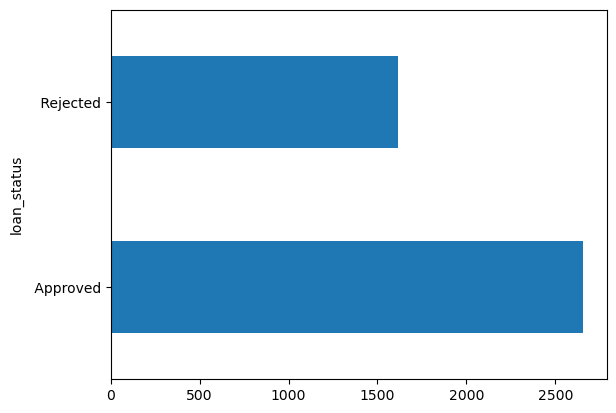

In [135]:
df["loan_status"].value_counts().plot(kind="barh")

# Descriptive Statistics

In [27]:
df.shape

(4269, 13)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [29]:
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


# EXPLORATORY DATA ANALYSIS (EDA)

In [30]:
df.isnull().any()

loan_id                      False
 no_of_dependents            False
 education                   False
 self_employed               False
 income_annum                False
 loan_amount                 False
 loan_term                   False
 cibil_score                 False
 residential_assets_value    False
 commercial_assets_value     False
 luxury_assets_value         False
 bank_asset_value            False
 loan_status                 False
dtype: bool

In [23]:
df.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [32]:
df.duplicated().sum()

0

In [33]:
print(df.columns)

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')


In [131]:
df['loan_status'].unique()

array([' Approved', ' Rejected'], dtype=object)

In [132]:
loan_grouped = df.groupby('loan_status')
pd.DataFrame(loan_grouped.size(), columns=['observations'])

,observations
loan_status,
Approved,2656
Rejected,1613


# VISUALIZATIONS

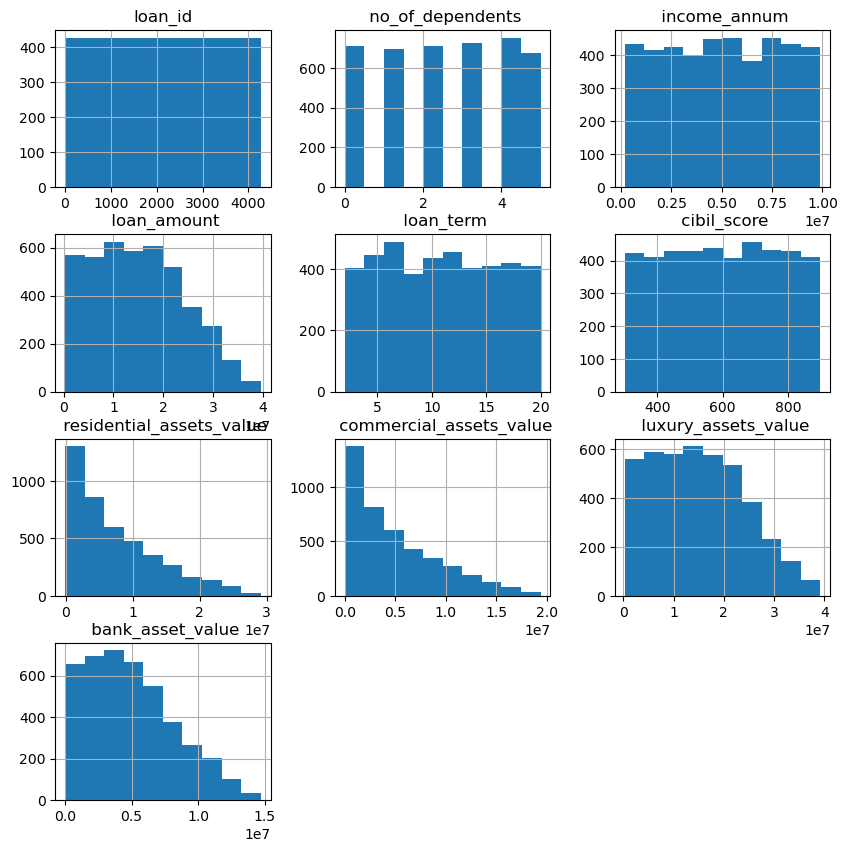

In [48]:
#Histogram to visualize the numerical features- to show the distribution of the data
df.hist(figsize=(10,10))
plt.show()

# correlation between all the numerical variables

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
loan_id,1.000000,0.005326,0.012592,0.008170,0.009809,0.016323,0.020936,0.018595,-0.000862,0.010765
no_of_dependents,0.005326,1.000000,0.007266,-0.003366,-0.020111,-0.009998,0.007376,-0.001531,0.002817,0.011163
income_annum,0.012592,0.007266,1.000000,0.927470,0.011488,-0.023034,0.636841,0.640328,0.929145,0.851093
loan_amount,0.008170,-0.003366,0.927470,1.000000,0.008437,-0.017035,0.594596,0.603188,0.860914,0.788122
loan_term,0.009809,-0.020111,0.011488,0.008437,1.000000,0.007810,0.008016,-0.005478,0.012490,0.017177
cibil_score,0.016323,-0.009998,-0.023034,-0.017035,0.007810,1.000000,-0.019947,-0.003769,-0.028618,-0.015478
residential_assets_value,0.020936,0.007376,0.636841,0.594596,0.008016,-0.019947,1.000000,0.414786,0.590932,0.527418
commercial_assets_value,0.018595,-0.001531,0.640328,0.603188,-0.005478,-0.003769,0.414786,1.000000,0.591128,0.548576
luxury_assets_value,-0.000862,0.002817,0.929145,0.860914,0.012490,-0.028618,0.590932,0.591128,1.000000,0.788517
bank_asset_value,0.010765,0.011163,0.851093,0.788122,0.017177,-0.015478,0.527418,0.548576,0.788517,1.000000


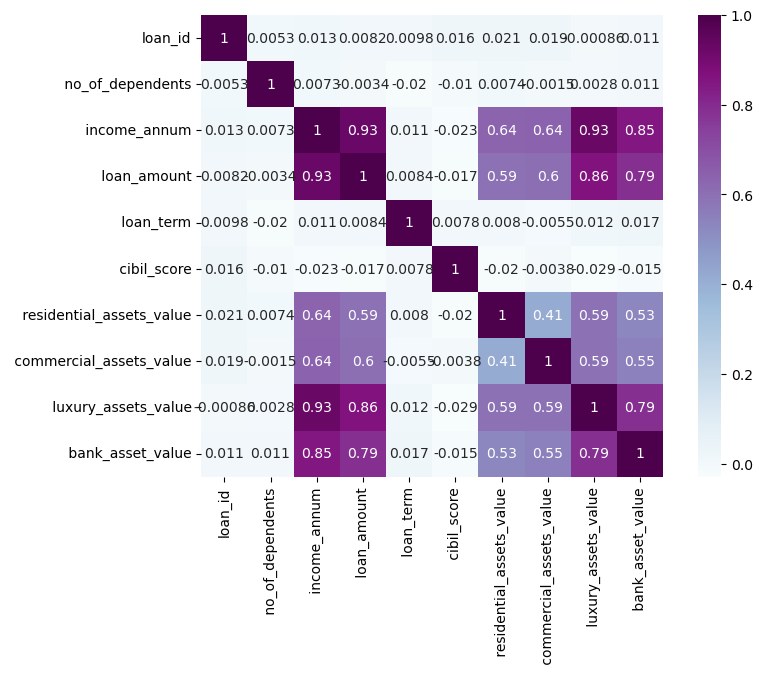

In [49]:
correlation_matrix = df.drop(columns=[' education', ' self_employed',' loan_status']).corr()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(correlation_matrix, vmax=1, square=True, cmap="BuPu", annot=True)

correlation_matrix


# DATA PREPROCESSING

In [74]:
df

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


In [75]:
df['loan_status']

0        Approved
1        Rejected
2        Rejected
3        Rejected
4        Rejected
          ...    
4264     Rejected
4265     Approved
4266     Rejected
4267     Approved
4268     Approved
Name: loan_status, Length: 4269, dtype: object

In [86]:
X = df.drop('loan_status', axis=1) 
y = df['loan_status']

In [109]:
#converting categorical variables to numerical format
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

categorical_columns = ['education', 'self_employed' ]

for column in categorical_columns:
    X[column] = le.fit_transform(X[column])

y = le.fit_transform(y)

In [110]:
X

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
0,1,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000
1,2,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000
2,3,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000
3,4,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000
4,5,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000
...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,0,1,1000000,2300000,12,317,2800000,500000,3300000,800000
4265,4266,0,1,1,3300000,11300000,20,559,4200000,2900000,11000000,1900000
4266,4267,2,1,0,6500000,23900000,18,457,1200000,12400000,18100000,7300000
4267,4268,1,1,0,4100000,12800000,8,780,8200000,700000,14100000,5800000


In [111]:
y

array([0, 1, 1, ..., 1, 0, 0])

## SPLITING THE DATA INTO TRAINING AND TESTING DATASETS

In [112]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
1675,1676,5,1,0,7900000,29900000,6,568,5800000,13900000,15900000,8700000
1164,1165,0,1,1,9600000,34000000,12,710,23800000,10300000,38100000,7800000
192,193,1,0,0,800000,2900000,8,682,2200000,1100000,2900000,700000
910,911,2,0,1,4900000,13100000,18,754,8200000,3300000,16500000,7200000
567,568,5,0,1,3000000,11100000,12,441,8500000,2500000,7300000,2000000
...,...,...,...,...,...,...,...,...,...,...,...,...
3444,3445,0,0,1,1300000,4700000,16,530,3200000,1000000,3800000,800000
466,467,5,1,1,500000,1800000,18,411,1000000,500000,1300000,200000
3092,3093,4,1,1,8600000,20600000,16,449,10800000,10600000,28700000,5400000
3772,3773,2,1,1,7000000,21400000,12,541,3700000,1300000,19800000,9600000


## FEATURES STANDARDIZATION

In [113]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_train

array([[-0.38682838,  1.51250774,  1.00263891, ...,  2.04678575,
         0.07808278,  1.16041374],
       [-0.80430304, -1.43500078,  1.00263891, ...,  1.22311091,
         2.49843196,  0.88201987],
       [-1.59840356, -0.84549907, -0.99736803, ..., -0.8818359 ,
        -1.33923881, -1.31419838],
       ...,
       [ 0.7708264 ,  0.92300603,  1.00263891, ...,  1.29175048,
         1.47359943,  0.13963624],
       [ 1.32636998, -0.25599737,  1.00263891, ..., -0.83607619,
         0.50327926,  1.4388076 ],
       [-1.0526637 ,  0.92300603, -0.99736803, ..., -0.28695963,
         1.03750048, -0.10782497]])

In [114]:
scaled_X_test = scaler.transform(X_test)
scaled_X_test

array([[-0.36395305,  1.51250774, -0.99736803, ...,  1.15447134,
         0.05627784,  0.72735662],
       [-0.79695025, -0.25599737, -0.99736803, ...,  1.04007205,
         0.28522978,  0.54176071],
       [-1.50363436,  0.33350433, -0.99736803, ...,  2.57302245,
         1.45179448,  0.51082806],
       ...,
       [-0.54368774,  1.51250774,  1.00263891, ...,  0.49095549,
        -0.37982112,  0.88201987],
       [-1.20952306,  0.92300603,  1.00263891, ..., -0.83607619,
        -1.0121646 , -1.09766982],
       [-0.84515183, -0.84549907,  1.00263891, ...,  0.14775765,
        -0.59787059, -0.97393921]])

In [115]:
def preprocessing_function(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    scaled_X_train = scaler.fit_transform(X_train)
    scaled_X_test = scaler.transform(X_test)
    return scaled_X_train, scaled_X_test, y_train, y_test

## MODEL TRAINING

In [116]:
from sklearn.svm import SVC

svm_clf = SVC()
svm_clf.fit(scaled_X_train, y_train)

SVC()

In [117]:
y_test_predict = svm_clf.predict(scaled_X_test)
y_test_predict

array([1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,

In [118]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

import matplotlib.pyplot as plt

binary_conf_matrix = confusion_matrix(y_test, y_test_predict)
binary_conf_matrix


array([[502,  34],
       [ 21, 297]])

Text(50.722222222222214, 0.5, 'True')

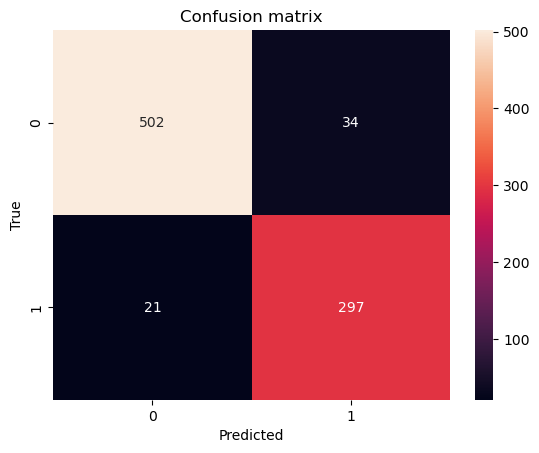

In [119]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, y_test_predict), annot=True, fmt='g')
plt.title('Confusion matrix')
plt.xlabel('Predicted')
plt.ylabel('True')


## Interpretation:

 Rows represent the true values (actual labels).

 Columns represent the predicted values from the model.

 True Positives (TP): The model correctly predicted 297 instances of the positive class (1).

 True Negatives (TN): The model correctly predicted 502 instances of the negative class (0).

 False Positives (FP): The model incorrectly predicted 34 instances as positive when they were actually negative.

 False Negatives (FN): The model incorrectly predicted 21 instances as negative when they were actually positive.



In [120]:
accuracy_score(y_test, y_test_predict)

0.9355971896955504

In [121]:
precision_score(y_test, y_test_predict)

0.8972809667673716

In [122]:
recall_score(y_test, y_test_predict)

0.9339622641509434

In [123]:
def algo_accuracy(y_test,predictions):
    conf_matrix = confusion_matrix(y_test,predictions)
    accuracy = accuracy_score(y_test,predictions)
    precision = precision_score(y_test,predictions)
    recall = recall_score(y_test,predictions)
    
    return conf_matrix, accuracy, precision, recall

In [124]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]
rfc = RandomForestClassifier()

# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(rfc, param_grid, cv=5,
                           scoring='accuracy',
                           return_train_score=True)
grid_search.fit(scaled_X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='accuracy')

In [125]:
rfc_clf = grid_search.best_estimator_
rfc_clf

RandomForestClassifier(max_features=8, n_estimators=30)

In [126]:
rfc_predictions = rfc_clf.predict(scaled_X_test)
rfc_predictions 

array([1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,

In [127]:
algo_accuracy(y_test, rfc_predictions)

(array([[528,   8],
        [  9, 309]]),
 0.9800936768149883,
 0.9747634069400631,
 0.9716981132075472)

In [128]:
precision_score(y_test, rfc_predictions)

0.9747634069400631

In [129]:
recall_score(y_test,rfc_predictions)

0.9716981132075472

This are the Metrics before:

Accuracy: 0.93

Precision: 0.89

Recall: 0.93

Confusion Matrix: [[502 34] [ 21 297]]

========================================

And these are the metrics after:

Accuracy: 0.98

Precision: 0.97

Recall: 0.97

Confusion Matrix: [[528 8] [ 9 309]]

# INTERPRETATION:

There’s a slight improvement in accuracy from 93% to 98%. This means the tuned model is making fewer incorrect predictions overall.

Significant improvement in recall shows that the tuned model is much better at correctly identifying loans that should be approved.

In conclusion, tuning has made the model much better at identifying approved loans (true positives) with minimal trade-offs in precision. This suggests the tuned model is more effective overall.


# CONCLUSION

The loan approval prediction model was built using logistic regression to classify whether a loan application would be approved or rejected based on key applicant features such as education status, income, employment status, and loan amount. After hyperparameter tuning, the model's performance improved, with the accuracy increasing from 93% to 98%.
